In [1]:
import glob as _glob
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder = 'results'
patterns = ['AUC', 'Balanced Accuracy']

par_list = ['model_type', 'hidden_dims', 'lambda1', 'lambda2',  'epochs', 'learning_rate', 'weight_decay', 'early_stopping', 'n_splits', 'df_name']
def find_finished(folder, patterns, par_list):
    finished = []
    for filename in _glob.glob(os.path.join(folder, '*.results')):
        with open(filename, 'r') as file:
            results = json.load(file)
            if results['done'] and results['model_type'] == 'IRT':
                for pattern in patterns:
                    mydict = { k: v  for k, v in results.items() if pattern in k } 
                    val = np.array([v for k, v in mydict.items() if 'val' in k])
                    test = np.array([v for k, v in mydict.items() if 'test' in k])
                    results.update({f'{pattern}_val_mean': np.mean(val), 
                                    f'{pattern}_val_std': np.std(val), 
                                    f'{pattern}_test_mean': np.mean(test), 
                                    f'{pattern}_test_std': np.std(test)})
                    par_list += [f'{pattern}_val_mean', f'{pattern}_val_std', f'{pattern}_test_mean', f'{pattern}_test_std']
                finished.append({k: v for k, v in results.items() if k in par_list})
    return finished
        
finished = find_finished(folder, patterns, par_list)
#print(finished)


Get best result

In [4]:
df = pd.DataFrame(finished)
df.head(20)

,df_name,epochs,learning_rate,weight_decay,early_stopping,n_splits,model_type,hidden_dims,lambda1,lambda2,AUC_val_mean,AUC_val_std,AUC_test_mean,AUC_test_std,Balanced Accuracy_val_mean,Balanced Accuracy_val_std,Balanced Accuracy_test_mean,Balanced Accuracy_test_std
0,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,3,0.100,0.100,0.762790,0.008771,0.760695,0.008851,0.671264,0.003480,0.667777,0.004044
1,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,1,0.001,0.100,0.761445,0.008599,0.759309,0.008809,0.670280,0.002907,0.667179,0.004343
2,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,1,0.100,0.100,0.762025,0.008669,0.759839,0.008746,0.671024,0.003204,0.667387,0.004374
3,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,3,0.000,0.010,0.781007,0.012531,0.778817,0.011944,0.684683,0.008910,0.682167,0.009312
4,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,1,0.010,0.001,0.762088,0.008535,0.760000,0.008639,0.670712,0.003318,0.667136,0.003874
5,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,3,0.000,0.000,0.847870,0.053916,0.845346,0.054878,0.753593,0.039983,0.749503,0.041433
6,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,5,0.000,0.001,0.781753,0.013038,0.779714,0.012742,0.685074,0.009426,0.681598,0.009912
7,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,1,0.010,0.000,0.771149,0.013267,0.769541,0.012841,0.680073,0.007117,0.676443,0.007769
8,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,3,0.010,0.010,0.762535,0.008970,0.760476,0.008938,0.671790,0.003865,0.668106,0.004242
9,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,1,0.000,0.100,0.771915,0.008668,0.769757,0.008256,0.677463,0.004505,0.674660,0.004964


In [5]:
df.sort_values('AUC_val_mean', ascending=False).head(1)

,df_name,epochs,learning_rate,weight_decay,early_stopping,n_splits,model_type,hidden_dims,lambda1,lambda2,AUC_val_mean,AUC_val_std,AUC_test_mean,AUC_test_std,Balanced Accuracy_val_mean,Balanced Accuracy_val_std,Balanced Accuracy_test_mean,Balanced Accuracy_test_std
20,mindsteps_set_test_matrix,10000,0.005,0,200,5,IRT,5,0.0,0.0,0.873499,0.072483,0.872029,0.072692,0.78321,0.061453,0.781674,0.062133


[Text(0.5, 0, 'dimensions'), Text(0, 0.5, 'AUC'), Text(0.5, 1.0, 'Test')]

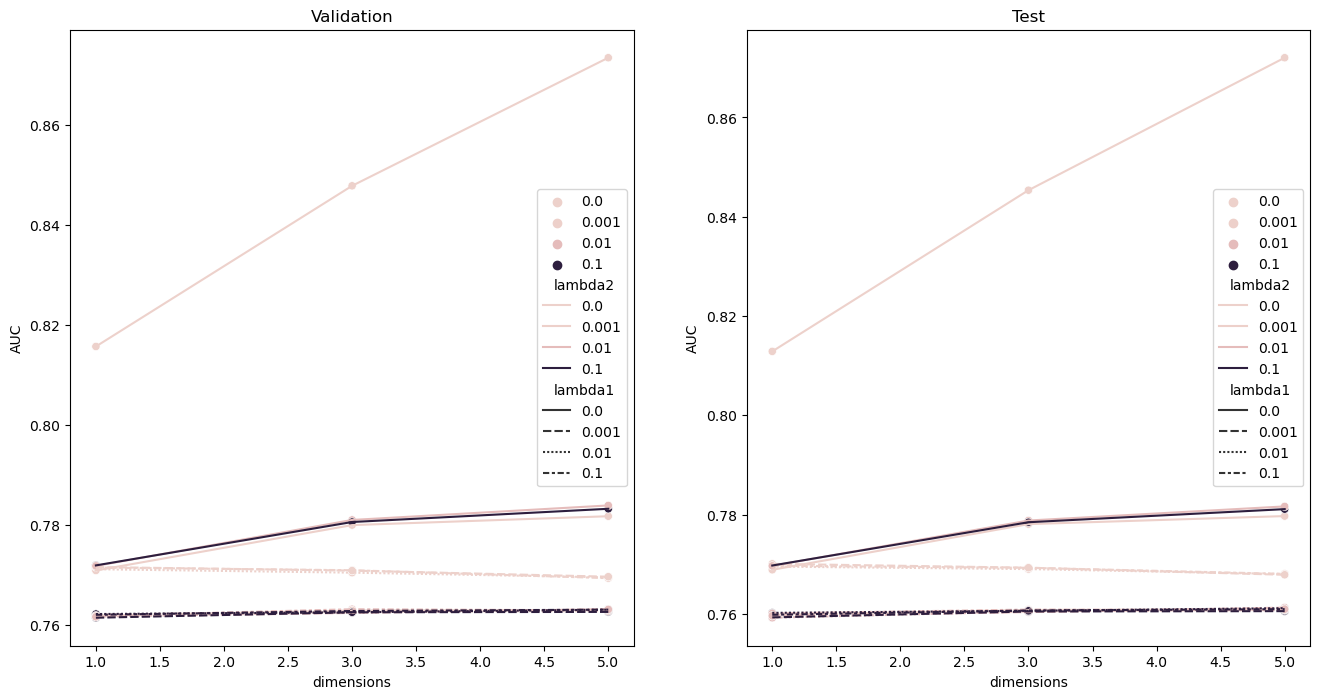

In [6]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(data=df, x='hidden_dims',  y='AUC_val_mean', hue='lambda2', ax=axes[0], color = 'k')
sns.scatterplot(data=df, x='hidden_dims',  y='AUC_test_mean',hue='lambda2', ax=axes[1], color = 'k')
sns.lineplot(data=df, x='hidden_dims',  y='AUC_val_mean', hue='lambda2', style='lambda1', ax=axes[0])
sns.lineplot(data=df, x='hidden_dims',  y='AUC_test_mean', hue='lambda2', style='lambda1', ax=axes[1])

axes[0].set(xlabel='dimensions', ylabel='AUC', title='Validation')
axes[1].set(xlabel='dimensions', ylabel='AUC', title='Test')